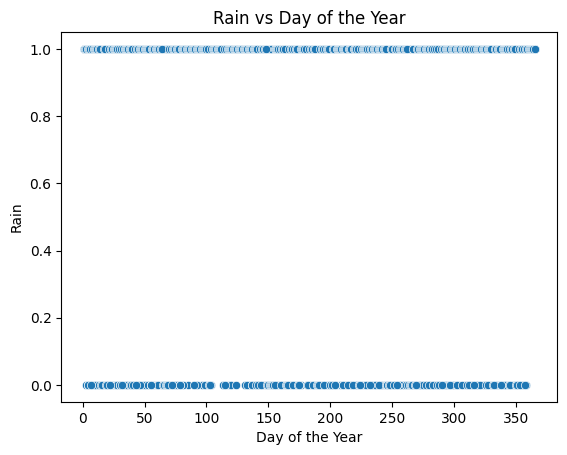

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (13).

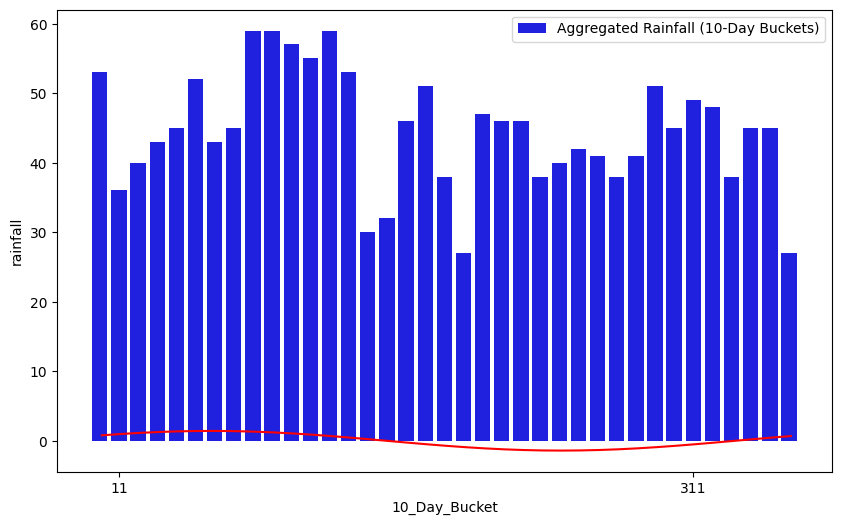

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/train.csv')

# Define a sinusoidal function to fit the data
def sinusoidal(x, amplitude, phase, offset):
    return amplitude * np.sin(2 * np.pi * x / 365 + phase) + offset

# Fit the sinusoidal function to the data
days = data['day']
rain = data['rainfall']
date = pd.to_datetime(data['day'], format='%j')
month = date.dt.strftime('%B')
params, _ = curve_fit(sinusoidal, days, rain, p0=[max(rain), 0, np.mean(rain)])

# Generate data for the fitted curve
days_fit = np.linspace(1, 365, 365)
rain_fit = sinusoidal(days_fit, *params)

# Create a DataFrame for the fitted data
fitted_data = pd.DataFrame({'Day': days_fit, 'Rain': rain_fit})
fitted_data['Date'] = pd.to_datetime(fitted_data['Day'], format='%j')
fitted_data['Month'] = fitted_data['Date'].dt.strftime('%B')

###############################################
#
# Saving param rain normal distribution
#
###############################################
# Generate data for the fitted curve
days_fit = np.linspace(1, 365, 365)
rain_fit = sinusoidal(days_fit, *params)
# Scale the rain_fit values using StandardScaler
scaler = StandardScaler()
rain_fit_scaled = scaler.fit_transform(rain_fit.reshape(-1, 1)).flatten()
# Create a DataFrame for the scaled fitted data
fitted_data_scaled = pd.DataFrame({'Day': days_fit, 'Rain_Scaled': rain_fit_scaled})
fitted_data_scaled['Date'] = pd.to_datetime(fitted_data_scaled['Day'], format='%j')
fitted_data_scaled['Month'] = fitted_data_scaled['Date'].dt.strftime('%B')
# Save the scaled fitted data to a CSV file in the 'params' folder
fitted_data_scaled.to_csv('params/scaled_fitted_data.csv', index=False)
###############################################

